In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import cv2
import re
from scipy.ndimage import rotate

In [2]:
r = re.compile("([A-Z]{5}[0-9]{4}[A-Z]{1})|([0-9]{2}/[0-9]{2}/[0-9]{4})")

In [ ]:
def disp_img(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

margin = 10

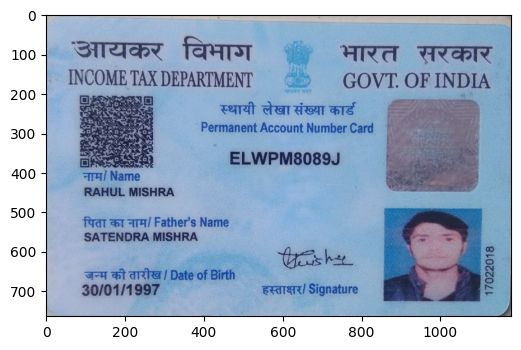

In [ ]:
img = cv2.imread() # BGR format
disp_img(img)

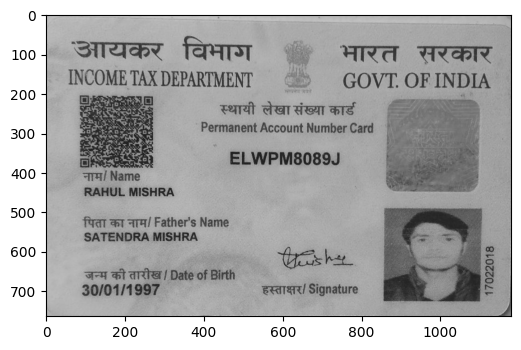

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
disp_img(img_gray)

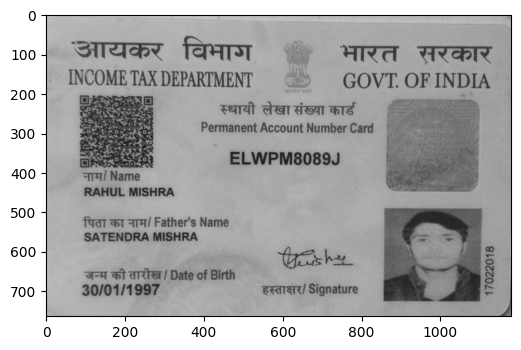

In [6]:
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
disp_img(img_blur)

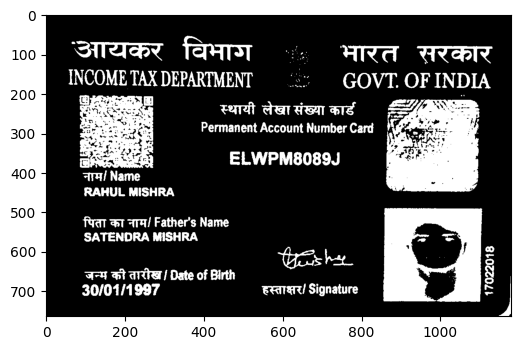

In [7]:
img_thresh = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
disp_img(img_thresh)

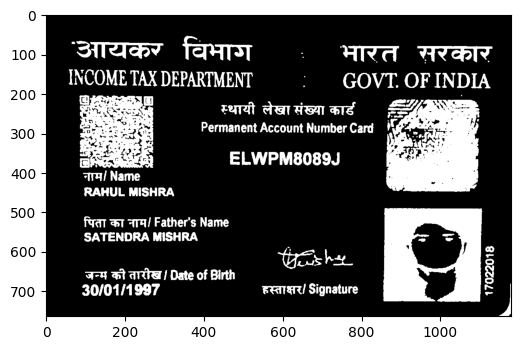

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img_opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel, iterations=1)

disp_img(img_opening)

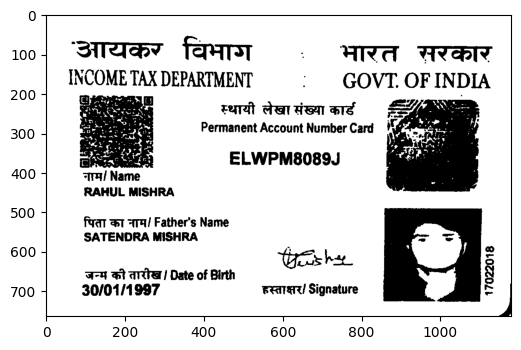

In [9]:
img_invert = 255 - img_opening
disp_img(img_invert)

In [11]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [12]:
data = pytesseract.image_to_data(img_gray, output_type='dict')

print(data.keys())
print('Detected Text:', data['text'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])
Detected Text: ['', '', '', '', 'Siete', 'faa', '', '', '', '   ', '', '', '', ' ', '', '', '', ' ', '', '', '', 'ART', 'Ue', '', 'INCOME', 'TAX', 'DEPARTMENT', '“', 'GOVT.', 'OF', 'INDIA', '', ':', 'i', 'Permanent', 'Account', 'Number', 'Card', 'te', '', 'pao', 'ELWPM8089J', '', 'ara!', 'Name', '', 'RAHUL', 'MISHRA', '', 'frat', 'ar', 'ara/', "Father's", 'Name', '', 'SATENDRA', 'MISHRA', '', '“eas', 'hat', ':', '', 'aH', 'ait', 'atthe', '/', 'Date', 'of', 'Birth', 'g', '', '30/01/1997', 'wearer!', 'Signature', 'aS', '', '', '', '']


In [13]:
bag = [(id, text) for id, text in enumerate(data['text']) if r.match(text)]
display(bag)


[(41, 'ELWPM8089J'), (71, '30/01/1997')]

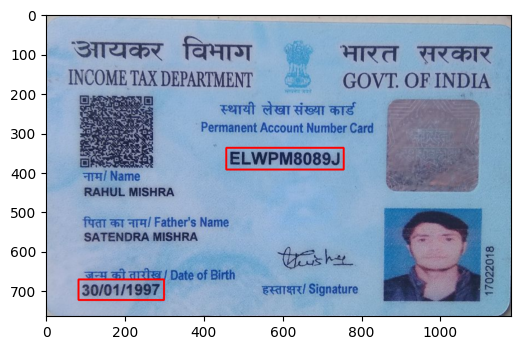

In [14]:
img_marked = img.copy()

for (id, text) in bag:
    left = data['left'][id] - margin
    top = data['top'][id] - margin
    width = data['width'][id] + 2*margin
    height = data['height'][id] + 2*margin
    cv2.rectangle(img_marked, (left, top), (left+width, top+height), (0, 0, 255), 4)

disp_img(img_marked)

✅ Image loaded and converted successfully.
✅ Name detected: RAHUL
✅ Father's Name detected: Name
✅ PAN Number detected: ELWPM8089J
✅ Date of Birth detected: 30/01/1997


c:\projects\personal information detect\personal\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128997 (\N{LARGE RED SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projects\personal information detect\personal\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128999 (\N{LARGE ORANGE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projects\personal information detect\personal\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128998 (\N{LARGE BLUE SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\projects\personal information detect\personal\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


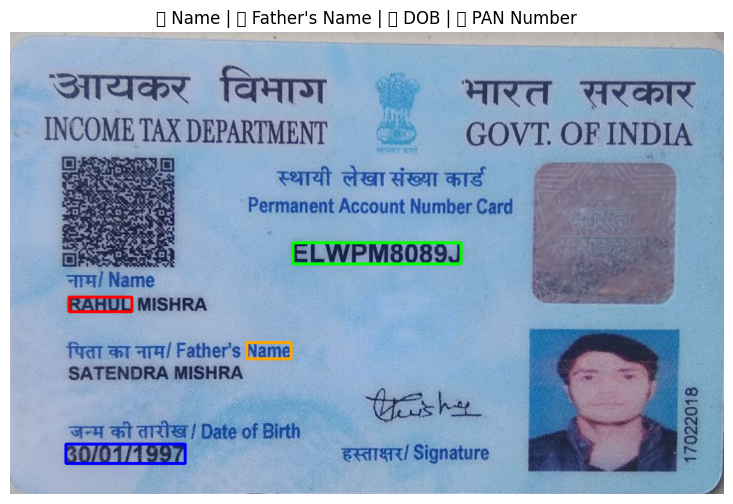

In [37]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import re
import os

# ✅ Update this to your image path or use the uploaded image
image_path = r"C:\projects\personal information detect\dataset\pan card\pan1.png"

# ✅ Load image
if not os.path.exists(image_path):
    raise FileNotFoundError(f"❌ File not found: {image_path}")

try:
    img_pil = Image.open(image_path).convert("RGB")
    img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    print("✅ Image loaded and converted successfully.")
except Exception as e:
    raise ValueError(f"❌ Failed to load image: {e}")

# ✅ Function to display image
def disp_img(img, title='Image'):
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# ✅ Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ✅ Run OCR
data = pytesseract.image_to_data(img_gray, output_type='dict')
img_highlighted = img.copy()

# ✅ Helper: Draw box and print
def draw_field(field_text, x, y, w, h, color_bgr, label):
    cv2.rectangle(img_highlighted, (x, y), (x + w, y + h), color_bgr, 3)
    print(f"✅ {label} detected: {field_text}")

# ✅ Extract Name
name_keywords = ['name']
father_keywords = ["father", "father's", "s/o", "d/o", "w/o"]
found_name = False
found_father = False

for i, word in enumerate(data['text']):
    text = word.strip().lower()

    # 🔴 Name
    if not found_name and text in name_keywords:
        for j in range(1, 4):
            if i + j < len(data['text']):
                possible_name = data['text'][i + j].strip()
                if possible_name and possible_name.isalpha():
                    x, y = data['left'][i + j], data['top'][i + j]
                    w, h = data['width'][i + j], data['height'][i + j]
                    draw_field(possible_name, x, y, w, h, (0, 0, 255), "Name")
                    found_name = True
                    break

    # 🟧 Father's Name
    if not found_father and text in father_keywords:
        for j in range(1, 4):
            if i + j < len(data['text']):
                possible_father = data['text'][i + j].strip()
                if possible_father and possible_father.isalpha():
                    x, y = data['left'][i + j], data['top'][i + j]
                    w, h = data['width'][i + j], data['height'][i + j]
                    draw_field(possible_father, x, y, w, h, (0, 165, 255), "Father's Name")
                    found_father = True
                    break

# ✅ Detect PAN Number
pan_pattern = re.compile(r'^[A-Z]{5}[0-9]{4}[A-Z]$')
for i, word in enumerate(data['text']):
    text = word.strip().upper()
    if pan_pattern.match(text):
        x, y = data['left'][i], data['top'][i]
        w, h = data['width'][i], data['height'][i]
        draw_field(text, x, y, w, h, (0, 255, 0), "PAN Number")
        break

# ✅ Detect DOB (DD/MM/YYYY or DD-MM-YYYY)
dob_pattern = re.compile(r'\d{2}[-/]\d{2}[-/]\d{4}')
for i, word in enumerate(data['text']):
    text = word.strip()
    if dob_pattern.match(text):
        x, y = data['left'][i], data['top'][i]
        w, h = data['width'][i], data['height'][i]
        draw_field(text, x, y, w, h, (255, 0, 0), "Date of Birth")
        break

# ✅ Show result
disp_img(img_highlighted, title="🟥 Name | 🟧 Father's Name | 🟦 DOB | 🟩 PAN Number")


✅ Image loaded successfully.
✅ PAN Number: ELWPM8089J
✅ Name: Ree, RAHUL MISHRA
✅ Name: y— > SATENDRA
✅ Father's Name: Name y— >
✅ DOB: 30/01/1997


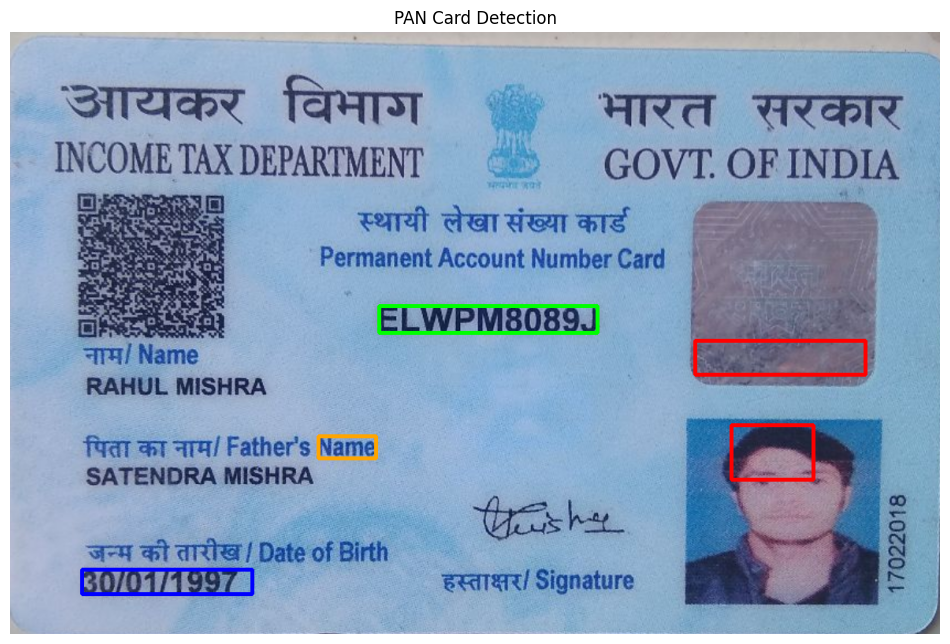


=== PAN Card Details ===
Pan Number: ELWPM8089J
Name: y— > SATENDRA
Father Name: Name y— >
Dob: 30/01/1997


✅ Image loaded successfully.
✅ Name: Ree, RAHUL MISHRA
✅ Name: y— > SATENDRA
✅ Father's Name: Name y— >


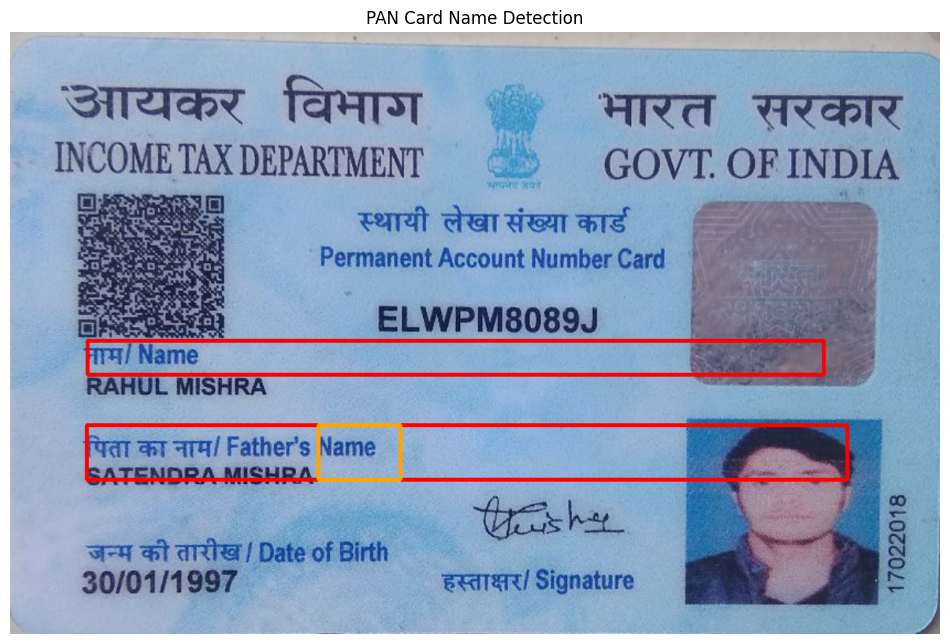


=== Detected Names ===
Name: y— > SATENDRA
Father Name: Name y— >


In [41]:
import cv2
import os
import pytesseract
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

# ✅ Configure Tesseract (if needed)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def load_image(image_path):
    """Load and validate PAN card image."""
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"❌ File not found: {image_path}")
    
    try:
        img_pil = Image.open(image_path).convert("RGB")
        img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
        print("✅ Image loaded successfully.")
        return img
    except Exception as e:
        raise ValueError(f"❌ Image loading failed: {e}")

def preprocess_image(img):
    """Enhance image for better OCR."""
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Denoising
    denoised = cv2.fastNlMeansDenoising(gray, h=10)
    
    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                  cv2.THRESH_BINARY, 11, 2)
    
    # Slight blur for smoother text
    blurred = cv2.GaussianBlur(thresh, (3, 3), 0)
    
    return blurred

def extract_text(img):
    """Extract text using Tesseract with optimized settings."""
    custom_config = r'--oem 3 --psm 6 -l eng'
    data = pytesseract.image_to_data(img, config=custom_config, output_type='dict')
    return data

def detect_names(img, ocr_data):
    """Detect only Name and Father's Name from PAN card."""
    img_highlighted = img.copy()
    detected_data = {}

    # 🟥 Name Detection (keyword + positional)
    name_keywords = ['name', 'nam', 'nme', 'ame']
    for i, word in enumerate(ocr_data['text']):
        if word.strip().lower() in name_keywords:
            full_name = []
            j = i + 1
            # Look for the next 3 non-empty words as name
            while j < len(ocr_data['text']) and len(full_name) < 3:
                next_word = ocr_data['text'][j].strip()
                if next_word:
                    full_name.append(next_word)
                j += 1
            if full_name:
                name = ' '.join(full_name)
                # Get bounding box of the full name
                x = min(ocr_data['left'][i+1:i+1+len(full_name)])
                y = min(ocr_data['top'][i+1:i+1+len(full_name)])
                w = max(ocr_data['width'][i+1:i+1+len(full_name)])
                h = max(ocr_data['height'][i+1:i+1+len(full_name)])
                cv2.rectangle(img_highlighted, (x, y), (x + w, y + h), (0, 0, 255), 3)  # Red
                detected_data['name'] = name
                print(f"✅ Name: {name}")

    # 🟧 Father's Name (keyword + S/O, D/O)
    father_keywords = ["father", "father's", "s/o", "d/o", "w/o"]
    for i, word in enumerate(ocr_data['text']):
        if word.strip().lower() in father_keywords:
            father_name = []
            j = i + 1
            # Look for the next 3 non-empty words as father's name
            while j < len(ocr_data['text']) and len(father_name) < 3:
                next_word = ocr_data['text'][j].strip()
                if next_word:
                    father_name.append(next_word)
                j += 1
            if father_name:
                father = ' '.join(father_name)
                # Get bounding box of the full father's name
                x = min(ocr_data['left'][i+1:i+1+len(father_name)])
                y = min(ocr_data['top'][i+1:i+1+len(father_name)])
                w = max(ocr_data['width'][i+1:i+1+len(father_name)])
                h = max(ocr_data['height'][i+1:i+1+len(father_name)])
                cv2.rectangle(img_highlighted, (x, y), (x + w, y + h), (0, 165, 255), 3)  # Orange
                detected_data['father_name'] = father
                print(f"✅ Father's Name: {father}")

    return img_highlighted, detected_data

def display_results(img, title="PAN Card Name Detection"):
    """Display detected names."""
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# ✅ Main Function
def detect_names_from_pan(image_path):
    """Run name detection pipeline."""
    try:
        # 1️⃣ Load image
        img = load_image(image_path)
        
        # 2️⃣ Preprocess for better OCR
        processed_img = preprocess_image(img)
        
        # 3️⃣ Extract text
        ocr_data = extract_text(processed_img)
        
        # 4️⃣ Detect only names
        highlighted_img, detected_data = detect_names(img, ocr_data)
        
        # 5️⃣ Display results
        display_results(highlighted_img)
        
        return detected_data
    
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# 🚀 Run Detection
if __name__ == "__main__":
    image_path = r"C:\projects\personal information detect\dataset\pan card\pan1.png"
    name_data = detect_names_from_pan(image_path)
    
    if name_data:
        print("\n=== Detected Names ===")
        for field, value in name_data.items():
            print(f"{field.replace('_', ' ').title()}: {value}")